In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.saving import load_model

In [8]:
import tensorflow.keras as t

In [12]:
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]


In [3]:
import tensorflow.keras as K
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
from tensorflow.keras.saving import load_model
import tensorflow as tf
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [4]:
v19_m = load_model('/kaggle/input/4-models/vgg19_97.keras')
v16_m = load_model('/kaggle/input/incept-v19/vggsf16.keras')

In [5]:
r_m = load_model('/kaggle/input/4-models/resnet_best_model.keras')
i_m = load_model('/kaggle/input/incept-v19/inceptionv3sf.keras')

In [6]:
v19_m.summary(),v16_m.summary(),r_m.summary(),i_m.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,308,834 (92.73 MB)

 Trainable params: 2,142,224 (8.17 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 2,142,226 (8.17 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,999,186 (72.48 MB)

 Trainable params: 2,142,248 (8.17 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,142,250 (8.17 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,491,938 (154.46 MB)

 Trainable params: 8,445,968 (32.22 MB)

 Non-trainable params: 23,600,000 (90.03 MB)

 Optimizer params: 8,445,970 (32.22 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 75, 75, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 75, 75, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,640,602 (345.77 MB)

 Trainable params: 30,202,056 (115.21 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 60,404,114 (230.42 MB)

(None, None, None, None)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential

In [8]:
def invert_threshold(image, threshold=0.5):
    inverted_image = tf.where(image > threshold, 0.0, 1.0)  # Invert based on threshold
    return inverted_image


train_dir = '/kaggle/input/gujarati-p-data/gujarati-handwritten-digit-dataset-master/Train Set'
test_dir = '/kaggle/input/gujarati-p-data/gujarati-handwritten-digit-dataset-master/Test Set'


train_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: invert_threshold(x / 255.0)
)

test_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: invert_threshold(x / 255.0)
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32), 
    color_mode='grayscale', 
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  
    color_mode='grayscale',  
    batch_size=32,
    class_mode='categorical'
)

Found 5600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


In [9]:
import numpy as np


train_images, train_labels = [], []
for images, labels in train_generator:
    train_images.append(images)
    train_labels.append(labels)
    if len(train_images) * train_generator.batch_size >= train_generator.samples:
        break

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)


test_images, test_labels = [], []
for images, labels in test_generator:
    test_images.append(images)
    test_labels.append(labels)
    if len(test_images) * test_generator.batch_size >= test_generator.samples:
        break

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)


x = np.concatenate((train_images, test_images), axis=0)
y = np.concatenate((train_labels, test_labels), axis=0)

print(x.shape)
print(y.shape)

(8000, 32, 32, 1)
(8000, 10)


In [10]:
r_m_4096 = K.models.Model(inputs=r_m.inputs,outputs=r_m.layers[-3].output)

In [11]:
r_x = r_m_4096.predict(x)

I0000 00:00:1725134313.433815     107 service.cc:145] XLA service 0x782fb00033a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725134313.433878     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 30/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

I0000 00:00:1725134316.120788     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [10]:
 np.save('/kaggle/working/r_x.npy',r_x)

In [12]:
i_m_4096 = K.models.Model(inputs=i_m.inputs,outputs=i_m.layers[-3].output)
i_x = i_m_4096.predict(x)
i_x.shape

250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step


(8000, 4096)

In [12]:
np.save('/kaggle/working/newi_x.npy',i_x)


In [13]:
v16_m_4096 = K.models.Model(inputs=v16_m.inputs,outputs=v16_m.layers[-3].output)
v16_x = v16_m_4096.predict(x)
v16_x.shape

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(8000, 4096)

In [14]:
np.save('/kaggle/working/newv16_x.npy',v16_x)

In [14]:
v19_m_4096 = K.models.Model(inputs=v19_m.inputs,outputs=v19_m.layers[-3].output)
v19_x = v19_m_4096.predict(x)
v19_x.shape

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(8000, 4096)

In [16]:
np.save('/kaggle/working/v19_x.npy',v19_x)

In [15]:
r_m = r_x
i_m = i_x
v16_m = v16_x
v19_m = v19_x

In [16]:
r_m.shape,i_m.shape,v16_m.shape,v19_m.shape

((8000, 4096), (8000, 4096), (8000, 4096), (8000, 4096))

In [17]:
r_m_scaled = (r_m - r_m.mean(axis=0)) / r_m.std(axis=0)
i_m_scaled = (i_m - i_m.mean(axis=0)) / i_m.std(axis=0)
v16_m_scaled = (v16_m - v16_m.mean(axis=0)) / v16_m.std(axis=0)
v19_m_scaled = (v19_m - v19_m.mean(axis=0)) / v19_m.std(axis=0)

/tmp/ipykernel_36/3440327942.py:2: RuntimeWarning: invalid value encountered in divide
  i_m_scaled = (i_m - i_m.mean(axis=0)) / i_m.std(axis=0)
/tmp/ipykernel_36/3440327942.py:3: RuntimeWarning: invalid value encountered in divide
  v16_m_scaled = (v16_m - v16_m.mean(axis=0)) / v16_m.std(axis=0)
/tmp/ipykernel_36/3440327942.py:4: RuntimeWarning: invalid value encountered in divide
  v19_m_scaled = (v19_m - v19_m.mean(axis=0)) / v19_m.std(axis=0)


In [20]:
v16_m_scaled.shape

(8000, 4096)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=20)
r_m_p = pca.fit_transform(r_m)
r_m_p.shape

(8000, 20)

In [20]:
v16_m_p = pca.fit_transform(v16_m)
i_m_p = pca.fit_transform(i_m)
v19_m_p = pca.fit_transform(v19_m)

In [21]:
z = r_m_p
z.shape

(8000, 20)

In [22]:
z = np.append(z,i_m_p,axis=1)
z = np.append(z,v16_m_p,axis=1)
z = np.append(z,v19_m_p,axis=1)

In [23]:
z.shape

(8000, 80)

In [27]:
np.save('/kaggle/working/z.npy',z)

In [24]:
y.shape

(8000, 10)

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(z)

In [27]:
y_r = np.where(y)

AttributeError: 'tuple' object has no attribute 'size'

In [28]:
df['y'] = y_r[1]

In [29]:
from sklearn.model_selection import train_test_split
z_train, z_test, y_train, y_test = train_test_split(
    df.drop(['y'], axis=1), 
    df['y'],                
    test_size=0.2,           
    stratify=df['y'],        
    random_state=42         
)

In [30]:
y_test.shape

(1600,)

In [31]:
z_train.shape,z_test.shape,y_train.shape,y_test.shape

((6400, 80), (1600, 80), (6400,), (1600,))

In [37]:
clf = XGBClassifier()

In [38]:
clf.fit(z_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
clf.score(z_test,y_test)

0.99625

In [38]:
clf = XGBClassifier(eval_metric='mlogloss', n_estimators=25)  # Adjust n_estimators as needed
evals = [(z_train, y_train), (z_test, y_test)]

# Train the model and capture the evaluation history
history = clf.fit(z_train, y_train, eval_set=evals, early_stopping_rounds=10, verbose=True)

# Extract evaluation results
results = history.evals_result()
epochs = len(results['validation_0']['mlogloss'])


[0]	validation_0-mlogloss:1.03390	validation_1-mlogloss:1.04577
[1]	validation_0-mlogloss:0.70407	validation_1-mlogloss:0.71828


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-mlogloss:0.50045	validation_1-mlogloss:0.51685
[3]	validation_0-mlogloss:0.36226	validation_1-mlogloss:0.38047
[4]	validation_0-mlogloss:0.26500	validation_1-mlogloss:0.28463
[5]	validation_0-mlogloss:0.19519	validation_1-mlogloss:0.21542
[6]	validation_0-mlogloss:0.14440	validation_1-mlogloss:0.16445
[7]	validation_0-mlogloss:0.10724	validation_1-mlogloss:0.12709
[8]	validation_0-mlogloss:0.07988	validation_1-mlogloss:0.09985
[9]	validation_0-mlogloss:0.05975	validation_1-mlogloss:0.07937
[10]	validation_0-mlogloss:0.04484	validation_1-mlogloss:0.06395
[11]	validation_0-mlogloss:0.03376	validation_1-mlogloss:0.05216
[12]	validation_0-mlogloss:0.02552	validation_1-mlogloss:0.04316
[13]	validation_0-mlogloss:0.01941	validation_1-mlogloss:0.03635
[14]	validation_0-mlogloss:0.01491	validation_1-mlogloss:0.03134
[15]	validation_0-mlogloss:0.01152	validation_1-mlogloss:0.02729
[16]	validation_0-mlogloss:0.00898	validation_1-mlogloss:0.02422
[17]	validation_0-mlogloss:0.0070

In [39]:
clf.score(z_test,y_test)

0.9975

In [40]:
clf1 = XGBClassifier(eval_metric='mlogloss', n_estimators=25)  
evals = [(z_train, y_train), (z_test, y_test)]


history = clf1.fit(z_train, y_train, eval_set=evals, early_stopping_rounds=10, verbose=True)


results = history.evals_result()
epochs = len(results['validation_0']['mlogloss'])


[0]	validation_0-mlogloss:1.03390	validation_1-mlogloss:1.04577
[1]	validation_0-mlogloss:0.70407	validation_1-mlogloss:0.71828


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-mlogloss:0.50045	validation_1-mlogloss:0.51685
[3]	validation_0-mlogloss:0.36226	validation_1-mlogloss:0.38047
[4]	validation_0-mlogloss:0.26500	validation_1-mlogloss:0.28463
[5]	validation_0-mlogloss:0.19519	validation_1-mlogloss:0.21542
[6]	validation_0-mlogloss:0.14440	validation_1-mlogloss:0.16445
[7]	validation_0-mlogloss:0.10724	validation_1-mlogloss:0.12709
[8]	validation_0-mlogloss:0.07988	validation_1-mlogloss:0.09985
[9]	validation_0-mlogloss:0.05975	validation_1-mlogloss:0.07937
[10]	validation_0-mlogloss:0.04484	validation_1-mlogloss:0.06395
[11]	validation_0-mlogloss:0.03376	validation_1-mlogloss:0.05216
[12]	validation_0-mlogloss:0.02552	validation_1-mlogloss:0.04316
[13]	validation_0-mlogloss:0.01941	validation_1-mlogloss:0.03635
[14]	validation_0-mlogloss:0.01491	validation_1-mlogloss:0.03134
[15]	validation_0-mlogloss:0.01152	validation_1-mlogloss:0.02729
[16]	validation_0-mlogloss:0.00898	validation_1-mlogloss:0.02422
[17]	validation_0-mlogloss:0.0070

In [42]:
clf1.score(z_test,y_test)

0.9975

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

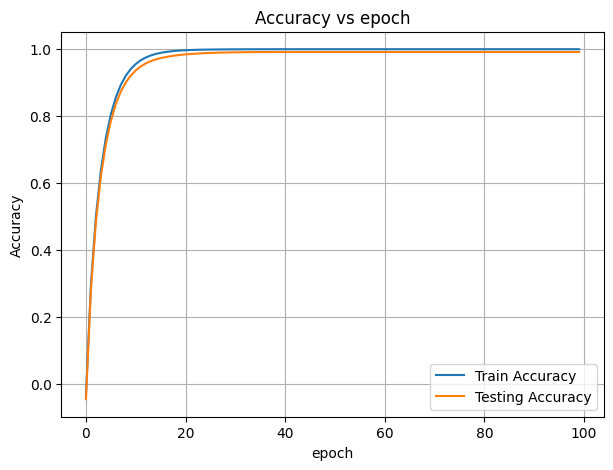

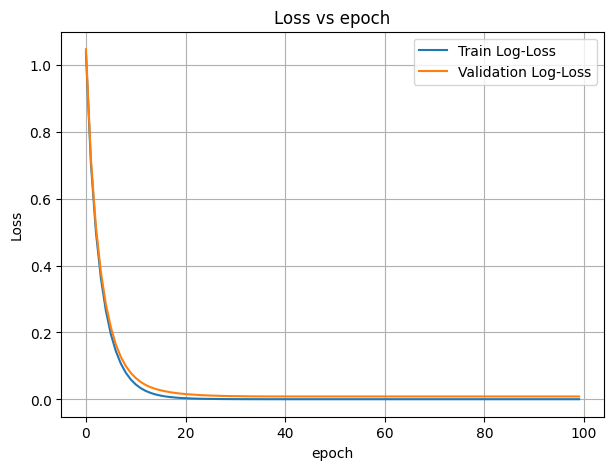

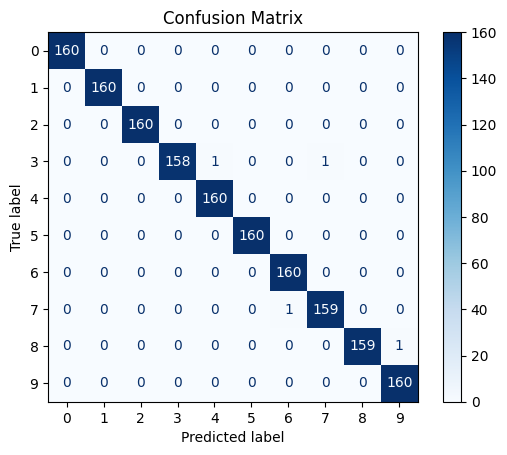

In [34]:
# Plot accuracy vs boosting rounds
plt.figure(figsize=(7, 5))
plt.plot(range(epochs), [1 - x for x in results['validation_0']['mlogloss']], label='Train Accuracy')
plt.plot(range(epochs), [1 - x for x in results['validation_1']['mlogloss']], label='Testing Accuracy')
plt.title('Accuracy vs epoch')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('/kaggle/working/accuracy_vs_boosting_rounds_new.png', dpi=300)

# Plot loss vs boosting rounds
plt.figure(figsize=(7, 5))
plt.plot(range(epochs), results['validation_0']['mlogloss'], label='Train Log-Loss')
plt.plot(range(epochs), results['validation_1']['mlogloss'], label='Validation Log-Loss')
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('/kaggle/working/loss_vs_boosting_rounds_new.png', dpi=300)

plt.show()

# Predict and plot confusion matrix
y_pred = clf.predict(z_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('/kaggle/working/confusion_matrix_new.png', dpi=300)
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(clf, df.drop(['y'], axis=1), df['y'], cv=5)
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f}")

Cross-Validated Accuracy: 0.9976
